In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Data Information Quality Notebooks/Project

/content/drive/MyDrive/Data Information Quality Notebooks/Project


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler
import dirty_accuracy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Information Quality Notebooks/Project/cancer.csv')
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [ ]:
# injects the data with outliers
data_mod_original = dirty_accuracy.injection(data, 42, 'cancer', 'Class')

saved cancer-accuracy50%
saved cancer-accuracy60%
saved cancer-accuracy70%
saved cancer-accuracy80%
saved cancer-accuracy90%


In [ ]:
data_mod = data_mod_original.copy()



Random Forest - Injection 50%
Accuracy: 0.8978
Precision: 0.8617
Recall: 0.886
F1: 0.8725


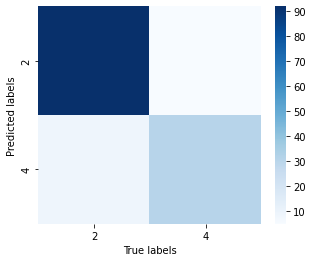

SVM - Injection 50%
Accuracy: 0.6934
Precision: 0.4661
Recall: 0.4882
F1: 0.4514


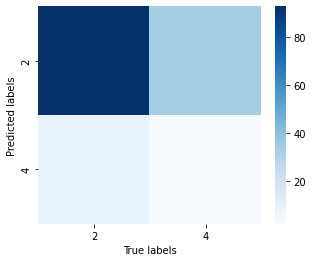



Random Forest - Injection 40%
Accuracy: 0.927
Precision: 0.927
Recall: 0.9059
F1: 0.9153


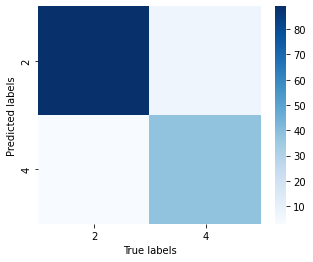

SVM - Injection 40%
Accuracy: 0.6788
Precision: 0.8382
Recall: 0.5111
F1: 0.4252


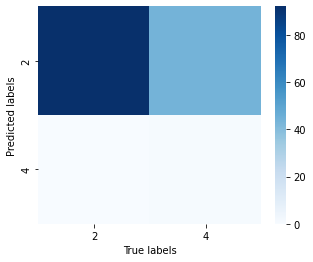



Random Forest - Injection 30%
Accuracy: 0.9051
Precision: 0.8876
Recall: 0.8669
F1: 0.8764


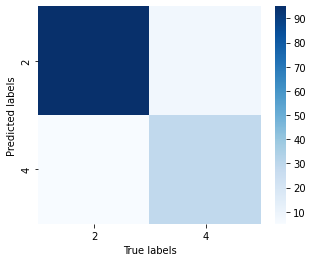

SVM - Injection 30%
Accuracy: 0.708
Precision: 0.5509
Recall: 0.5191
F1: 0.4948


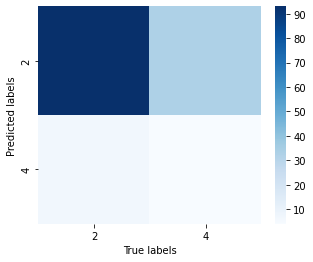



Random Forest - Injection 20%
Accuracy: 0.9635
Precision: 0.9591
Recall: 0.9522
F1: 0.9555


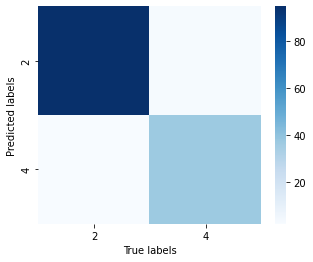

SVM - Injection 20%
Accuracy: 0.781
Precision: 0.7593
Recall: 0.6691
F1: 0.6873


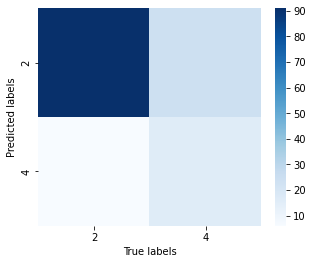



Random Forest - Injection 10%
Accuracy: 0.9343
Precision: 0.917
Recall: 0.9327
F1: 0.9242


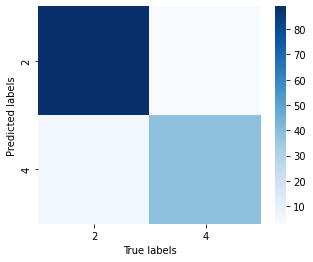

SVM - Injection 10%
Accuracy: 0.8102
Precision: 0.7851
Recall: 0.7503
F1: 0.7633


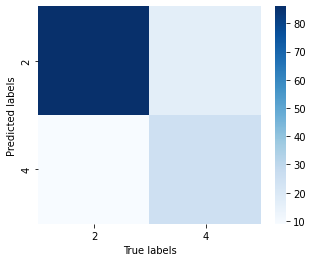

In [ ]:
# applies machine learning techniques and plots results
for i in range(len(data_mod)):
  X_train, X_test = train_test_split(data_mod[i], test_size=0.2, train_size=0.8)
  y_train = X_train.pop('Class')
  y_test = X_test.pop('Class')

  classifier1 = RandomForestClassifier(n_estimators=10)
  classifier1.fit(X_train, y_train)
  classifier2 = SVC()
  classifier2.fit(X_train, y_train)

  print()
  print()
  print("Random Forest - Injection "+str(50-i*10)+"%")

  predictions = classifier1.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  print("SVM - Injection "+ str(50-i*10)+"%")

  predictions = classifier2.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()


In [ ]:
# applies Kernel Density to do outlier detection

from sklearn.neighbors import KernelDensity
from numpy import quantile

for i in range(5):
  X = data_mod[i]
  kde = KernelDensity(kernel="gaussian", bandwidth=2.1).fit(X)
  scores = kde.score_samples(X)
  threshold = quantile(scores, .02) #select the 2% quantile

  idx = np.where(scores > threshold)
  data_mod[i] = X.iloc[idx]

  # print the number of remaining data points
  print(data_mod[i].shape[0])
  print()

352

401

417

545

607





Random Forest - Injection 50%
Accuracy: 0.8889
Precision: 0.8768
Recall: 0.8148
F1: 0.8393


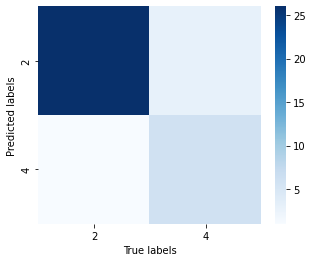

SVM - Injection 50%
Accuracy: 0.7222
Precision: 0.3714
Recall: 0.4815
F1: 0.4194


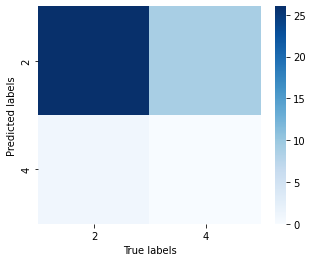



Random Forest - Injection 40%
Accuracy: 0.9024
Precision: 0.8576
Recall: 0.8576
F1: 0.8576


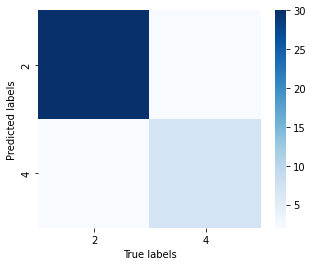

SVM - Injection 40%
Accuracy: 0.7805
Precision: 0.3902
Recall: 0.5
F1: 0.4384


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


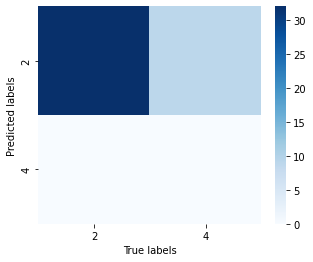



Random Forest - Injection 30%
Accuracy: 0.9286
Precision: 0.9545
Recall: 0.875
F1: 0.9048


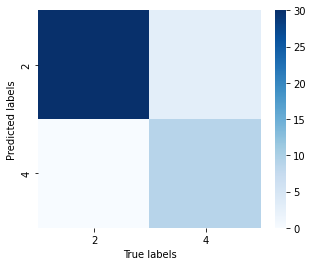

SVM - Injection 30%
Accuracy: 0.7143
Precision: 0.3571
Recall: 0.5
F1: 0.4167


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


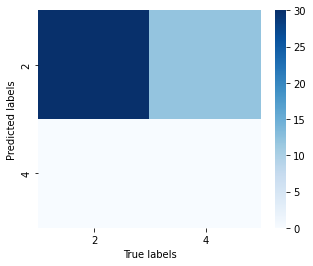



Random Forest - Injection 20%
Accuracy: 0.8727
Precision: 0.9054
Recall: 0.86
F1: 0.8664


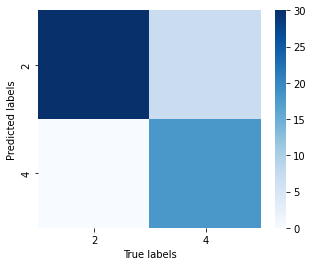

SVM - Injection 20%
Accuracy: 0.6545
Precision: 0.689
Recall: 0.63
F1: 0.6131


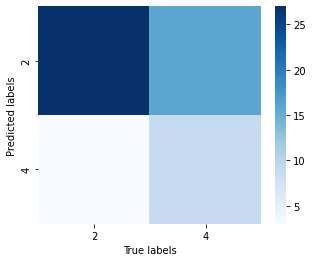



Random Forest - Injection 10%
Accuracy: 0.9344
Precision: 0.9004
Recall: 0.9341
F1: 0.9153


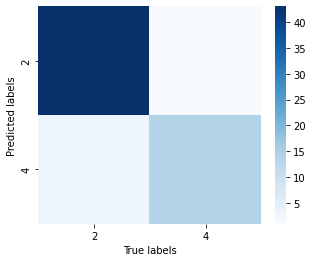

SVM - Injection 10%
Accuracy: 0.8033
Precision: 0.7348
Recall: 0.7123
F1: 0.7219


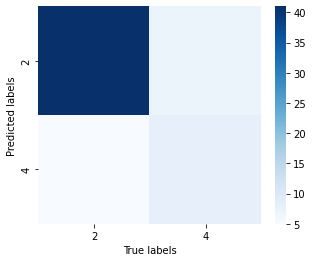

In [ ]:
# applies machine learning technique after Kernel Density outlier detection and plot the results
for i in range(len(data_mod)):
  X_train, X_test = train_test_split(data_mod[i], test_size=0.1, train_size=0.9)
  y_train = X_train.pop('Class')
  y_test = X_test.pop('Class')

  classifier1 = RandomForestClassifier(n_estimators=10)
  classifier1.fit(X_train, y_train)
  classifier2 = SVC()
  classifier2.fit(X_train, y_train)

  print()
  print()
  print("Random Forest - Injection "+str(50-i*10)+"%")

  predictions = classifier1.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  print("SVM - Injection "+str(50-i*10)+"%")

  predictions = classifier2.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()


In [ ]:
data_mod = data_mod_original.copy()

In [ ]:
# applies Isolation Forest for outlier detection

from sklearn.ensemble import IsolationForest

for i in range(5):
    rng = np.random.RandomState(99)

    classifier = IsolationForest(contamination=0.1*(5-i), random_state=rng)
    classifier.fit(data_mod[i])
    y_pred = classifier.predict(data_mod[i])
    idx = np.where(y_pred != -1)
    data_mod[i] = data_mod[i].iloc[idx]

    # prints number of remaining data points
    print(len(data_mod[i]))
    

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


342


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


410


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


478


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


546
614


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(




Random Forest - Injection 50%
Accuracy: 0.9714
Precision: 0.9821
Recall: 0.9375
F1: 0.9576


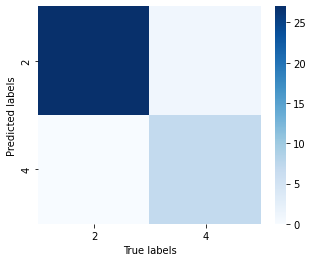

SVM - Injection 50%
Accuracy: 0.7714
Precision: 0.3857
Recall: 0.5
F1: 0.4355


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


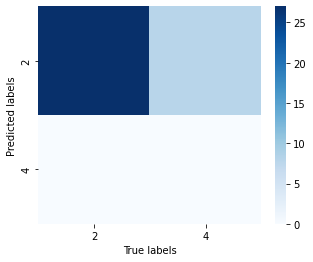



Random Forest - Injection 40%
Accuracy: 0.9512
Precision: 0.9024
Recall: 0.9024
F1: 0.9024


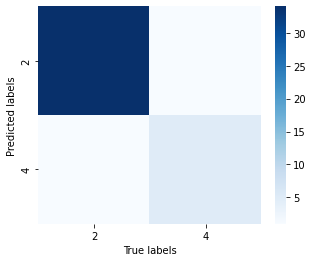

SVM - Injection 40%
Accuracy: 0.8049
Precision: 0.4231
Recall: 0.4714
F1: 0.4459


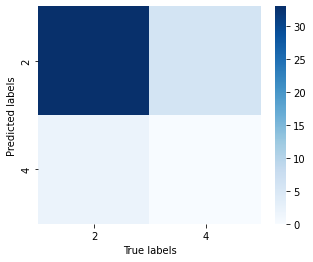



Random Forest - Injection 30%
Accuracy: 0.9583
Precision: 0.9531
Recall: 0.9531
F1: 0.9531


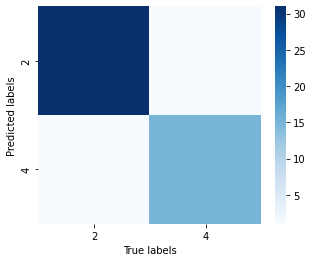

SVM - Injection 30%
Accuracy: 0.6667
Precision: 0.3333
Recall: 0.5
F1: 0.4


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


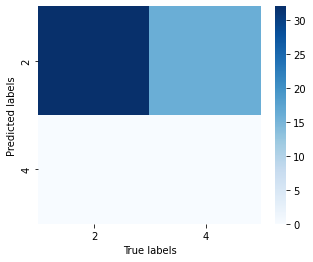



Random Forest - Injection 20%
Accuracy: 0.9636
Precision: 0.9542
Recall: 0.9542
F1: 0.9542


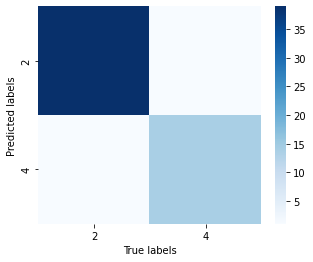

SVM - Injection 20%
Accuracy: 0.8545
Precision: 0.8684
Recall: 0.7542
F1: 0.7868


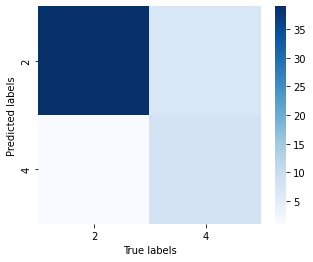



Random Forest - Injection 10%
Accuracy: 0.9516
Precision: 0.9375
Recall: 0.9634
F1: 0.9477


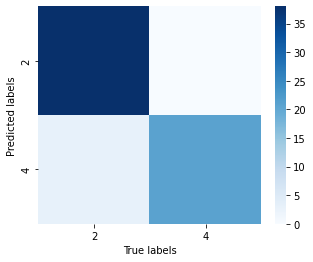

SVM - Injection 10%
Accuracy: 0.9194
Precision: 0.9268
Recall: 0.8926
F1: 0.9065


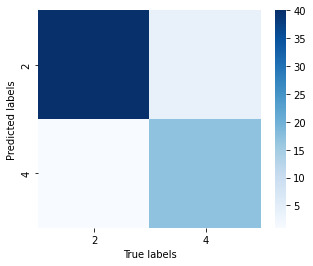

In [ ]:
# applies machine learning technique after Isolation Forest outlier detection and plot the results
for i in range(len(data_mod)):
  X_train, X_test = train_test_split(data_mod[i], test_size=0.1, train_size=0.9)
  y_train = X_train.pop('Class')
  y_test = X_test.pop('Class')

  classifier1 = RandomForestClassifier(n_estimators=10)
  classifier1.fit(X_train, y_train)
  classifier2 = SVC()
  classifier2.fit(X_train, y_train)

  print()
  print()
  print("Random Forest - Injection "+str(50-i*10)+"%")

  predictions = classifier1.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  print("SVM - Injection "+str(50-i*10)+"%")

  predictions = classifier2.predict(X_test)

  # Compute the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Compute the classification metrics
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average='macro')
  recall = recall_score(y_test, predictions, average='macro')
  f1 = f1_score(y_test, predictions, average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=[2,4], yticklabels=[2,4])
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()
